In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import datetime as dt
import dask.dataframe as dd

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches
from pathlib import Path
from sklearn.cluster import KMeans

In [2]:
import sys

sys.path.append("../src")
sys.path.append("../src/bout")

In [3]:
from core import SITE_NAMES, FREQUENCY_COLOR_MAPPINGS
import clustering as clstr
import bout as bt
import plot as bt_plt
import activity.subsampling as ss
import activity.activity_assembly as actvt

from cli import get_file_paths
from calls import plot_call_features, compute_features, call_extraction

['/Users/adityakrishna/duty-cycle-investigation/daily_notebook', '/Users/adityakrishna/miniconda3/envs/dc-study/lib/python311.zip', '/Users/adityakrishna/miniconda3/envs/dc-study/lib/python3.11', '/Users/adityakrishna/miniconda3/envs/dc-study/lib/python3.11/lib-dynload', '', '/Users/adityakrishna/miniconda3/envs/dc-study/lib/python3.11/site-packages', '../src', '../src/bout', '../src/bout', '../src/bout', '../src/bout', '../src', '../src', '../src/activity', '/Users/adityakrishna/duty-cycle-investigation/daily_notebook/../src/calls', '/Users/adityakrishna/duty-cycle-investigation/daily_notebook/../src', '/Users/adityakrishna/duty-cycle-investigation/daily_notebook/../src/bout', '/Users/adityakrishna/duty-cycle-investigation/daily_notebook/../src']


In [4]:
FIGSIZE = (12, 6)

In [5]:
def plot_audio_seg(audio_features, spec_features):
    """
    Function to plot the spectrogram of a provided audio segment
    """

    audio_seg = audio_features['audio_seg']
    fs = audio_features['sample_rate']
    start = audio_features['start']
    duration = audio_features['duration']

    plt.figure(figsize=FIGSIZE)
    plt.rcParams.update({'font.size' : 24})
    plt.title(f"Audio collected from {audio_features['site_name']} on {audio_features['file_datetime']} UTC", fontsize=22)
    plt.rcParams.update({'font.size': 24})
    plt.specgram(audio_seg, NFFT=spec_features['NFFT'], cmap=spec_features['cmap'], vmin=spec_features['vmin'])
    plt.yticks(ticks=np.linspace(0, 1, 6), labels=np.linspace(0, fs/2000, 6).astype('int'))
    plt.xticks(ticks=np.linspace(0, duration*(fs/2), 11), labels=np.round(np.linspace(start, start+duration, 11, dtype='float'), 2), rotation=30)
    plt.ylabel("Frequency (kHz)")
    plt.xlabel("Time (s)")
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


def load_and_plot_file(file_path, start, duration, rm_dB=50, nfft=1024):
    audio_file = sf.SoundFile(file_path)
    fs = audio_file.samplerate
    audio_file.seek(int(fs*start))
    audio_seg = audio_file.read(int(fs*duration))
    vmin = 20*np.log10(np.max(audio_seg)) -  rm_dB # hide anything below -rm_dB dB

    audio_features = dict()
    audio_features['site_name'] = SITE_NAMES[file_path.parent.name]
    audio_features['file_datetime'] = dt.datetime.strptime(file_path.name, "%Y%m%d_%H%M%S.WAV").strftime('%Y/%m/%d %H:%M')
    audio_features['file_path'] = file_path
    audio_features['audio_seg'] = audio_seg
    audio_features['sample_rate'] = fs
    audio_features['start'] = start
    audio_features['duration'] = duration

    spec_features = dict()
    spec_features['vmin'] = vmin
    spec_features['NFFT'] = nfft
    spec_features['cmap'] = 'jet'

    plot_audio_seg(audio_features, spec_features)

Looking at Foliage
Looking at 20210910_030000.WAV


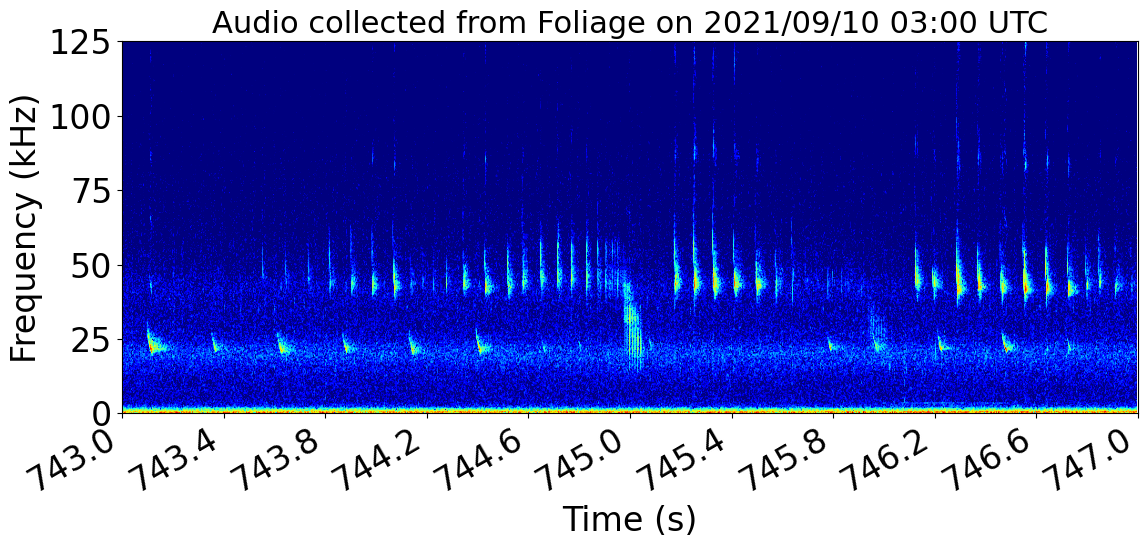

In [6]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[0]
print(f'Looking at {file_path.name}')
start = 743
duration = 4
rm_dB = 40

load_and_plot_file(file_path, start, duration, rm_dB)

Looking at Foliage
Looking at 20210910_030000.WAV


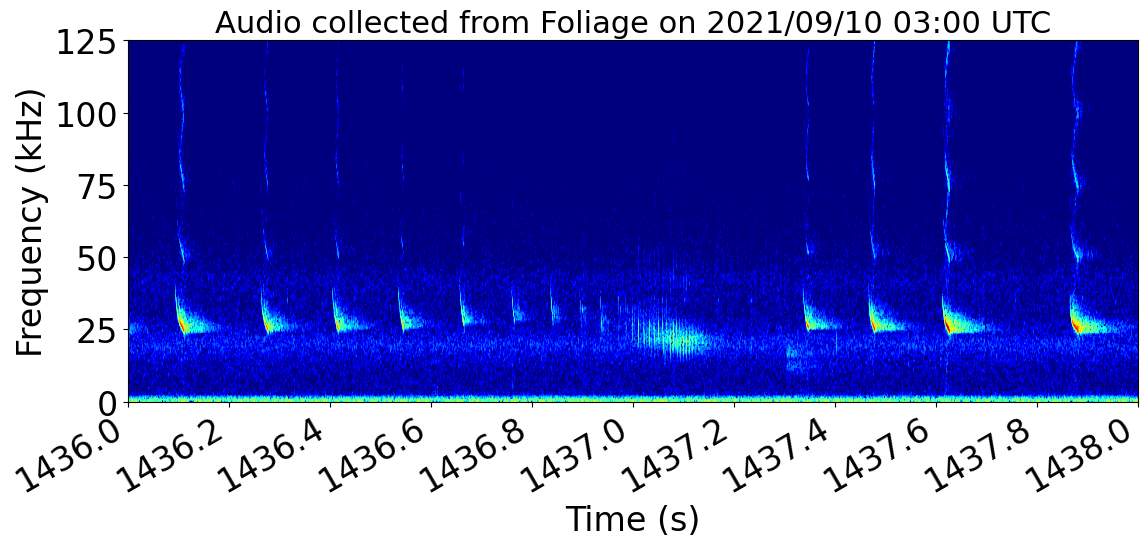

In [7]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[0]
print(f'Looking at {file_path.name}')
start = 1436
duration = 2
rm_dB = 50
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Foliage
Looking at 20220802_060000.WAV


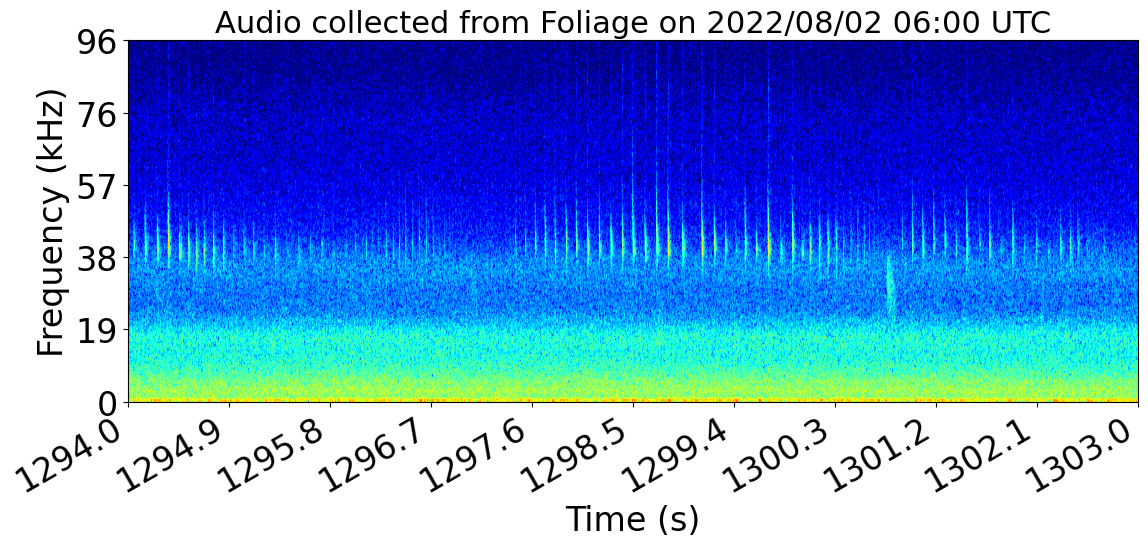

In [8]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[7]
print(f'Looking at {file_path.name}')
start = 1294
duration = 9
rm_dB = 45
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Foliage
Looking at 20220802_060000.WAV


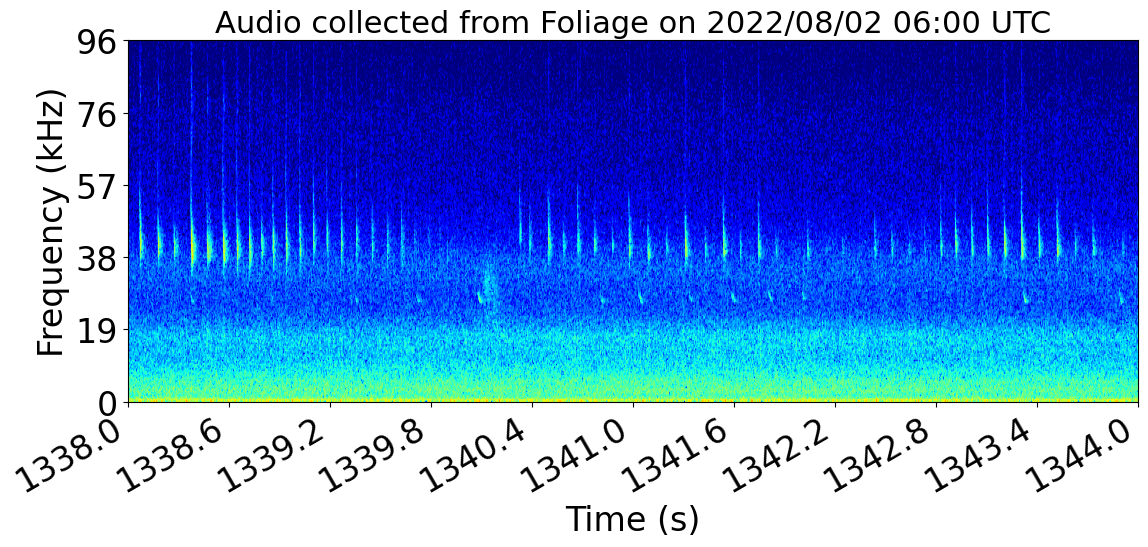

In [9]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[7]
print(f'Looking at {file_path.name}')
start = 1338
duration = 6
rm_dB = 50
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Foliage
Looking at 20210910_030000.WAV


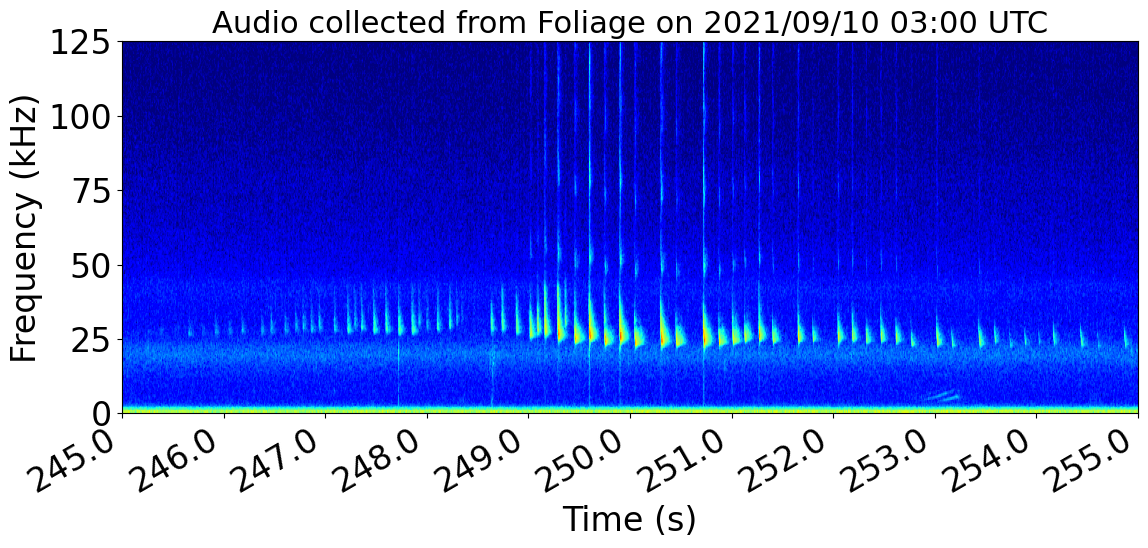

In [30]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[0]
print(f'Looking at {file_path.name}')
start = 245
duration = 10
rm_dB = 60
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Foliage
Looking at 20210910_030000.WAV


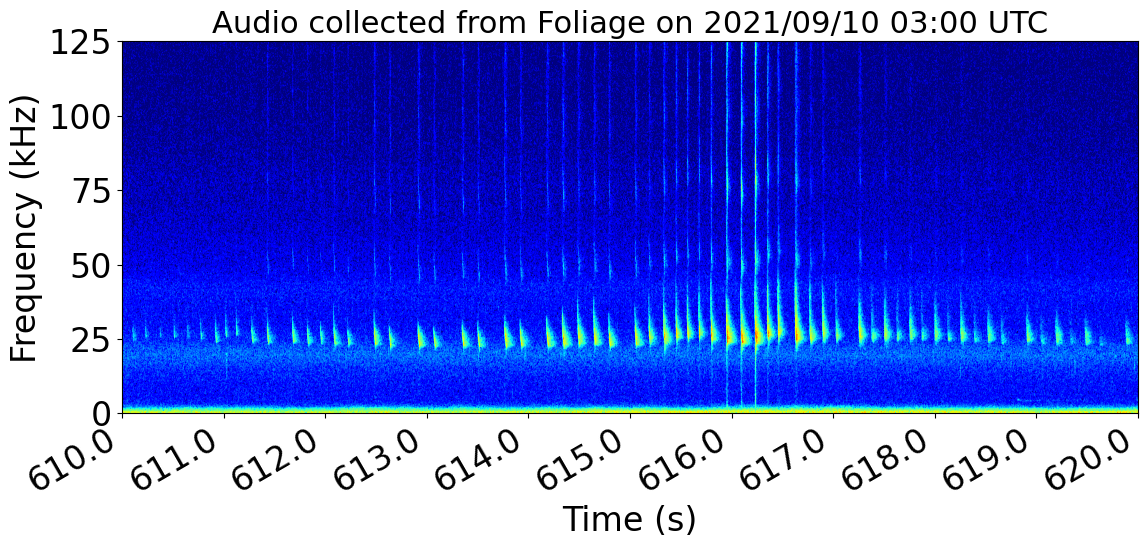

In [29]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[0]
print(f'Looking at {file_path.name}')
start = 610
duration = 10
rm_dB = 60
nfft = 1024

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Foliage
Looking at 20210910_030000.WAV


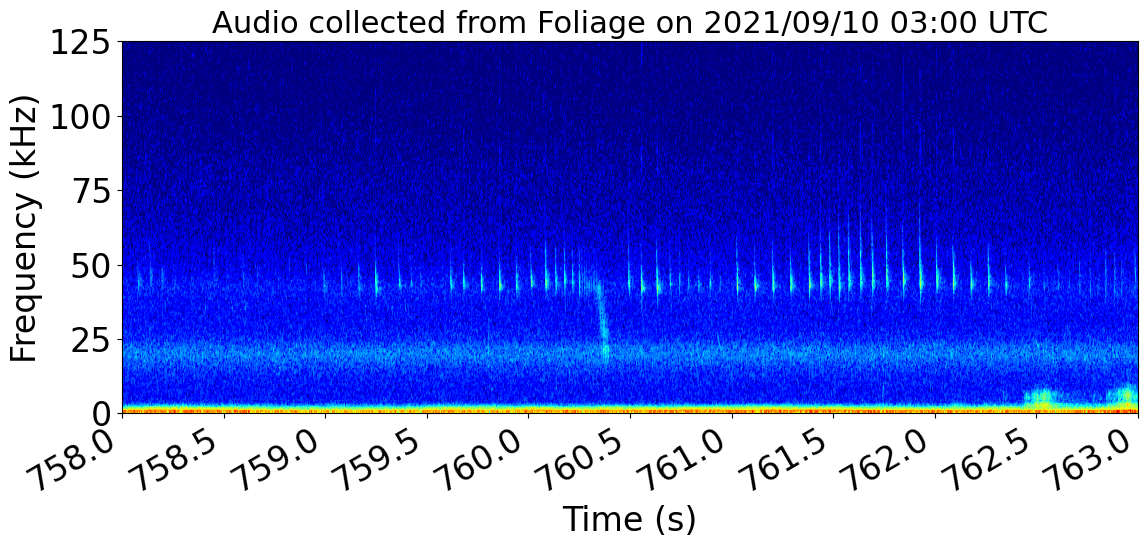

In [12]:
site_key = 'Foliage'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[0]
print(f'Looking at {file_path.name}')
start = 758
duration = 5
rm_dB = 50
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Carp Pond
Looking at 20220728_080000.WAV


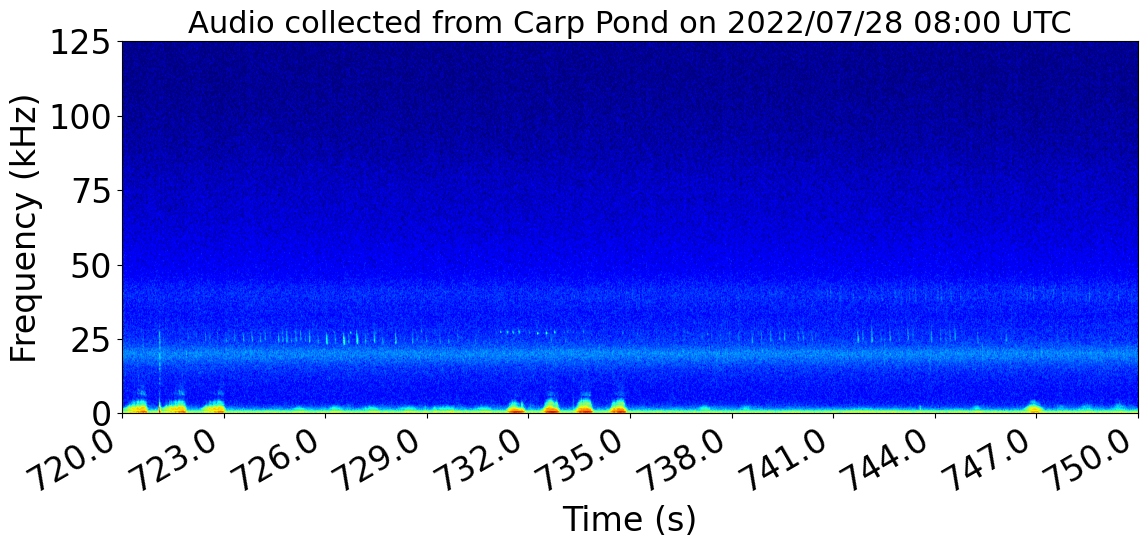

In [36]:
site_key = 'Carp'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[10]
print(f'Looking at {file_path.name}')
start = 720
duration = 30
rm_dB = 55
nfft = 1024

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Carp Pond
Looking at 20220728_080000.WAV


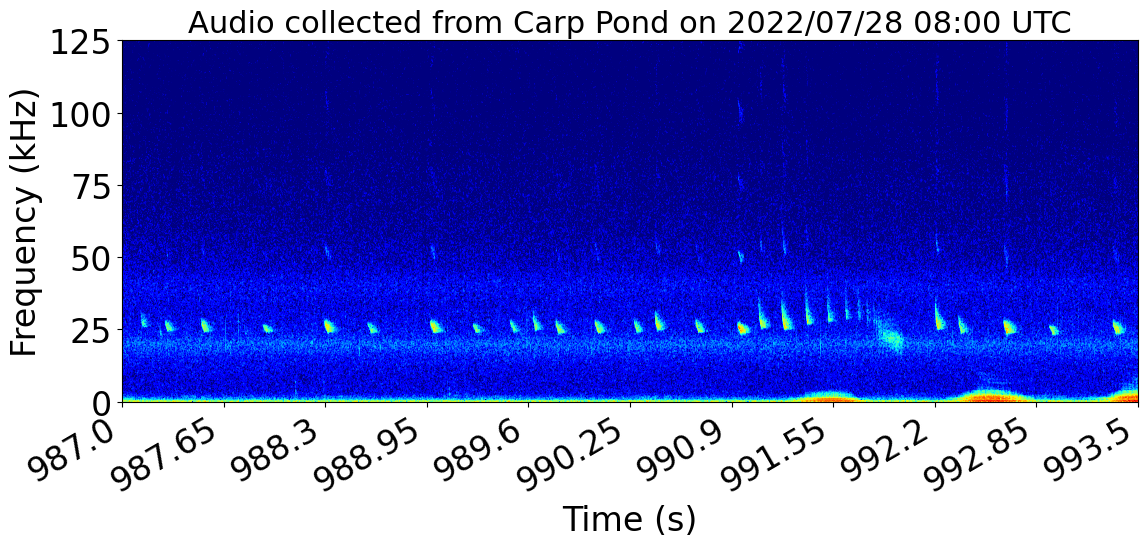

In [14]:
site_key = 'Carp'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[10]
print(f'Looking at {file_path.name}')
start = 987
duration = 6.5
rm_dB = 50
nfft = 1024

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Carp Pond
Looking at 20221004_030000.WAV


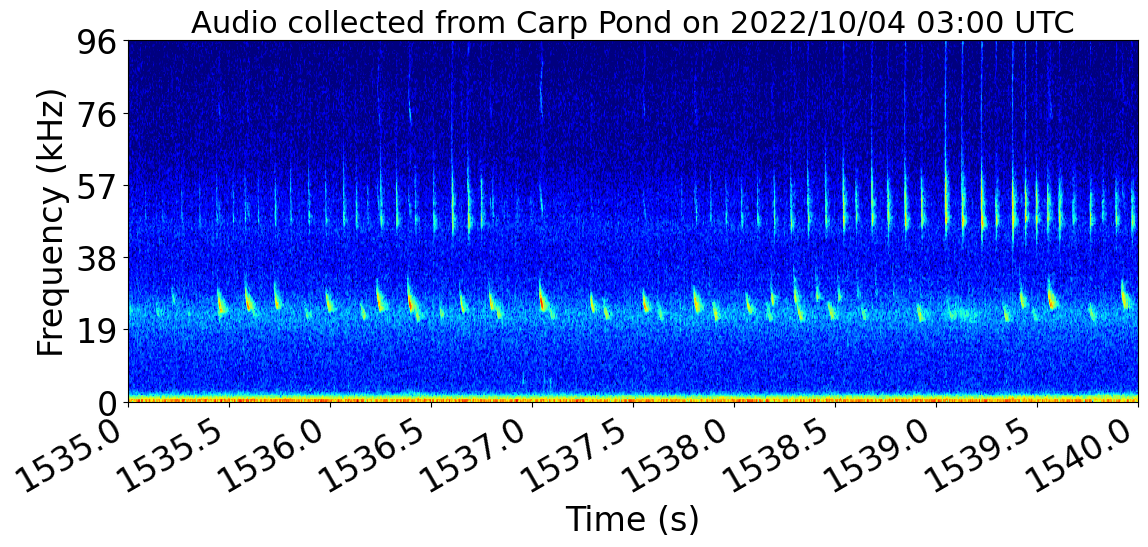

In [15]:
site_key = 'Carp'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[21]
print(f'Looking at {file_path.name}')
start = 1535
duration = 5
rm_dB = 50
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Telephone Field
Looking at 20220820_070000.WAV


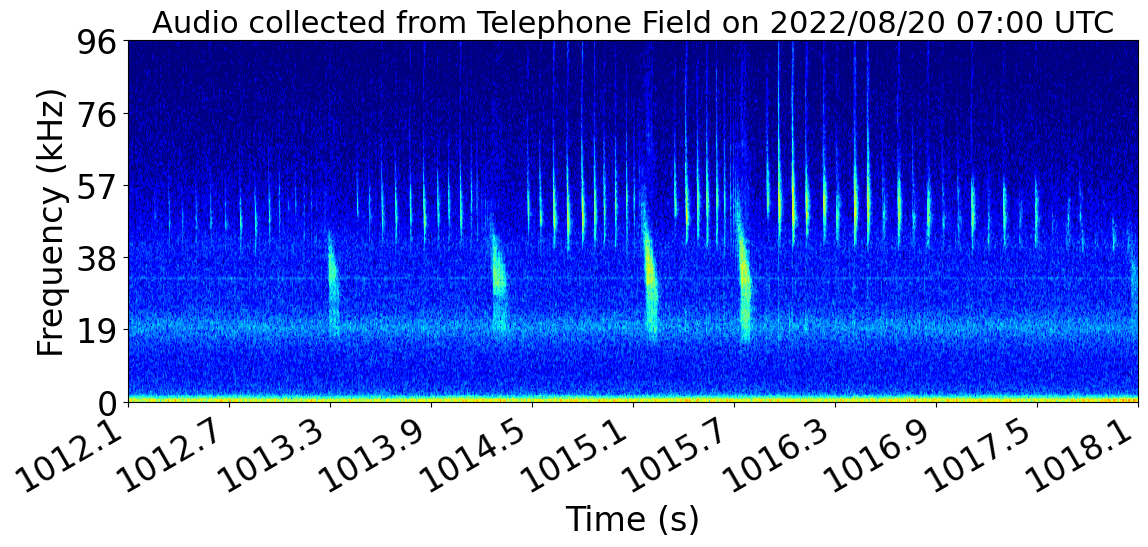

In [16]:
site_key = 'Telephone'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[8]
print(f'Looking at {file_path.name}')
start = 1012.1
duration = 6
rm_dB = 55
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Telephone Field
Looking at 20220820_070000.WAV


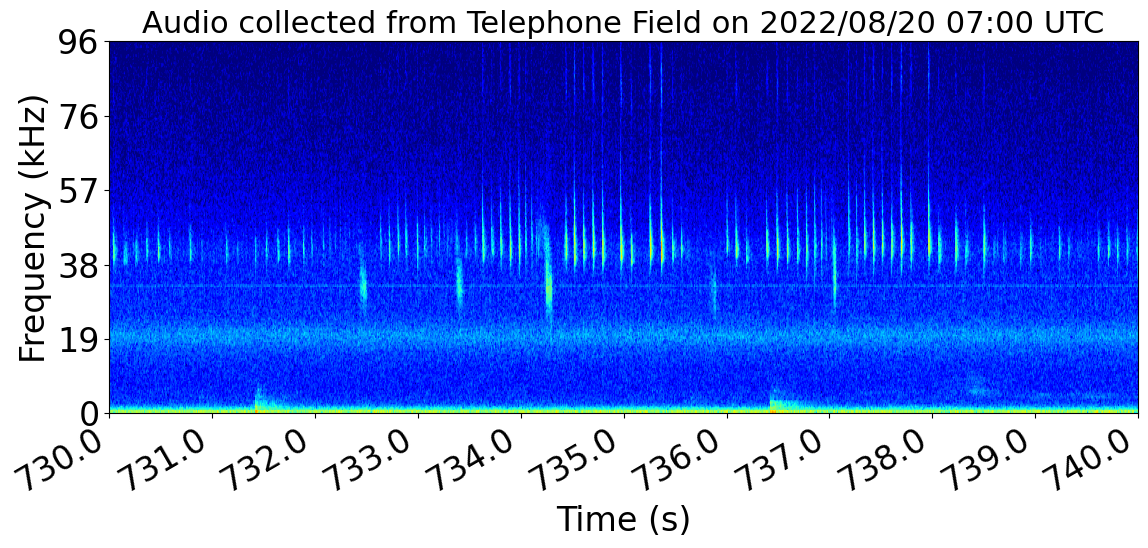

In [17]:
site_key = 'Telephone'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[8]
print(f'Looking at {file_path.name}')
start = 730
duration = 10
rm_dB = 55
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Telephone Field
Looking at 20220820_070000.WAV


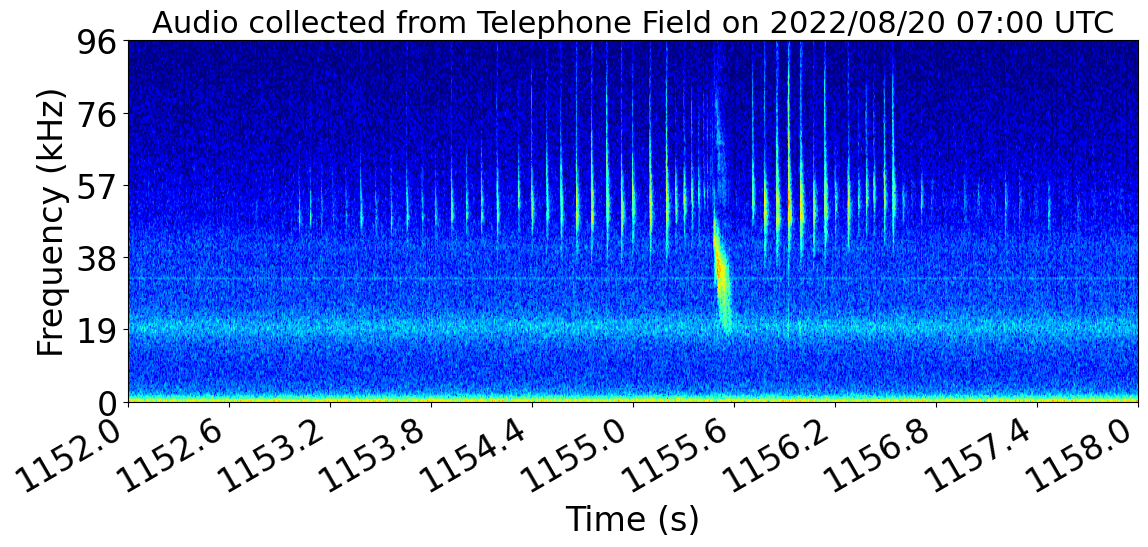

In [19]:
site_key = 'Telephone'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[8]
print(f'Looking at {file_path.name}')
start = 1152
duration = 6
rm_dB = 55
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Telephone Field
Looking at 20220820_070000.WAV


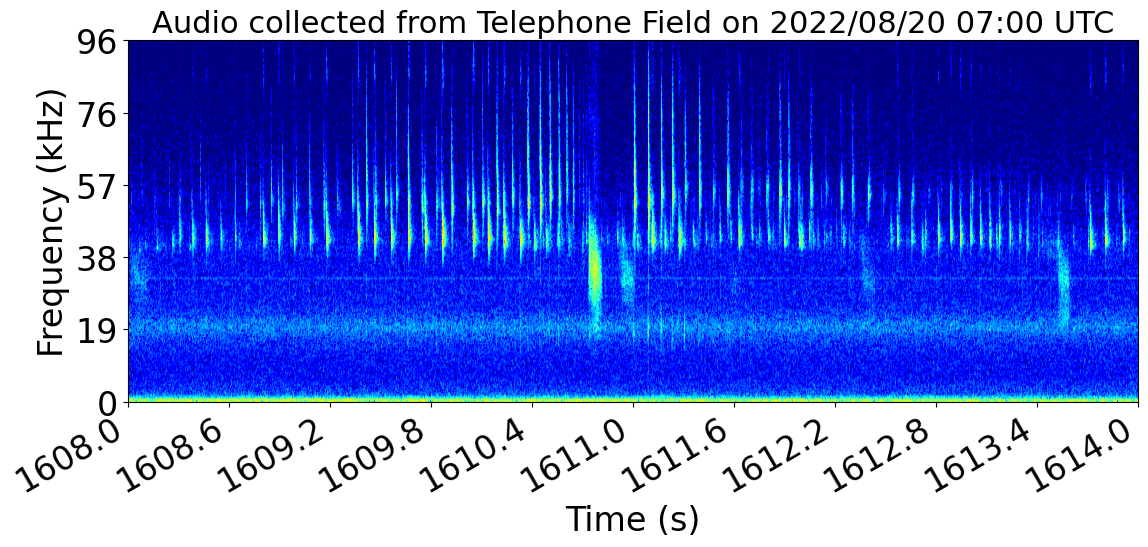

In [25]:
site_key = 'Telephone'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[8]
print(f'Looking at {file_path.name}')
start = 1608
duration = 6
rm_dB = 55
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)

Looking at Telephone Field
Looking at 20220820_070000.WAV


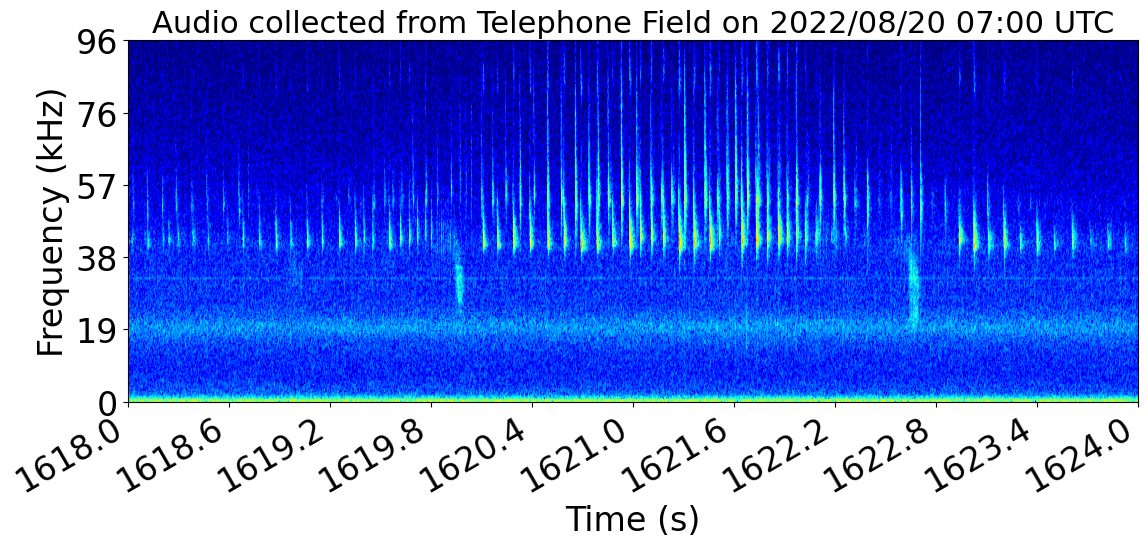

In [26]:
site_key = 'Telephone'

fig_details = dict()
fig_details['site_name'] = SITE_NAMES[site_key]
print(f'Looking at {fig_details["site_name"]}')
files_from_loc = sorted(list(Path(f'../data/audiomoth_recordings/').glob(pattern=f'*/{site_key}/*.WAV')))

file_path = files_from_loc[8]
print(f'Looking at {file_path.name}')
start = 1618
duration = 6
rm_dB = 55
nfft = 512

load_and_plot_file(file_path, start, duration, rm_dB, nfft)